# Machine Vision Lab 1
> Name - Ojas Patil
>
> Register Number - 21BAI1106

### Task 1: Basic Image Statistics and Color Space Conversion

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Step 1 - Reading the image

In [19]:
image_path = '/content/kame_house.jpg'
image = cv2.imread(image_path)

In [20]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Step 2 - Computing Basic Statistics

In [21]:
#computing basic statistics
means = cv2.mean(image)
stddevs = cv2.meanStdDev(image)[1]

print(f"Mean (B, G, R): {means}")
print(f"Standard Deviation (B, G, R): {stddevs.flatten()}")

Mean (B, G, R): (151.23013454861112, 127.74828944830247, 142.572393904321, 0.0)
Standard Deviation (B, G, R): [46.6318537  42.66823472 69.76581467]


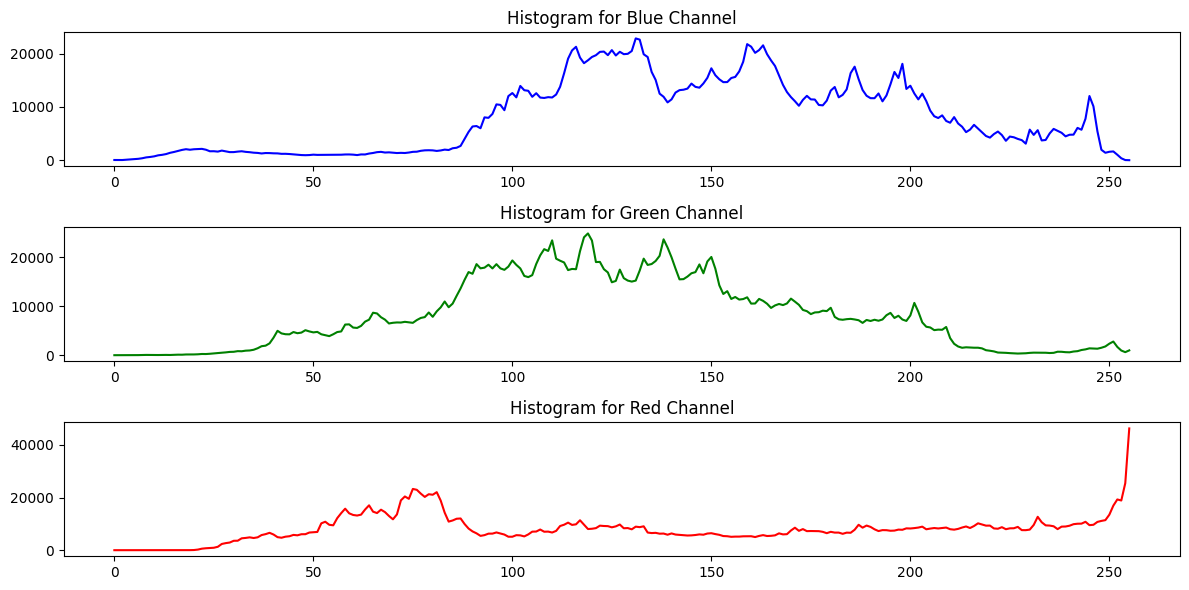

In [22]:
# Compute histograms for each channel
hist_b = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([image], [2], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(hist_b, color='blue')
plt.title('Histogram for Blue Channel')

plt.subplot(3, 1, 2)
plt.plot(hist_g, color='green')
plt.title('Histogram for Green Channel')

plt.subplot(3, 1, 3)
plt.plot(hist_r, color='red')
plt.title('Histogram for Red Channel')

plt.tight_layout()
plt.show()

Step 3 - Converting Color Spaces

In [23]:
# Convert image to HSV color space
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

image_hsv_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
image_lab_rgb = cv2.cvtColor(image_lab, cv2.COLOR_Lab2RGB)

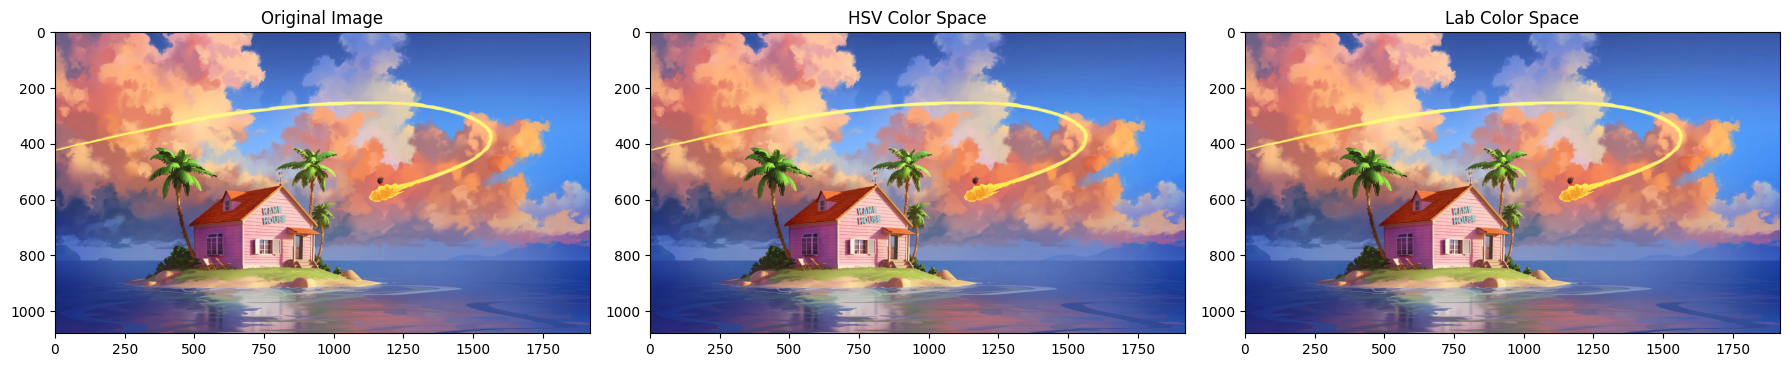

In [24]:
# Display the results
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(image_hsv_rgb)
plt.title('HSV Color Space')

plt.subplot(1, 3, 3)
plt.imshow(image_lab_rgb)
plt.title('Lab Color Space')

plt.tight_layout()
plt.show()

### Task 2 - Simple Image Segmentation Using Thresholding

In [25]:
image_path = '/content/car.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [27]:
# Apply the global thresholding

threshold_value = 127
_, segmented_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

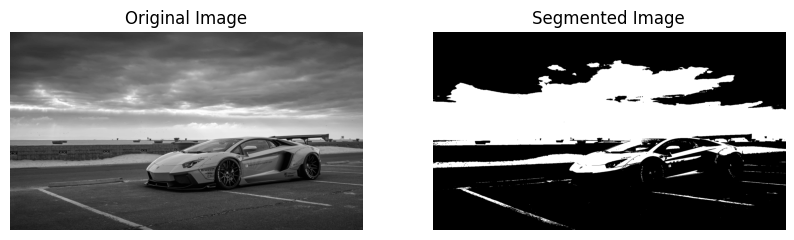

In [28]:
# Display the original image

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.show()

### Task 3 - Color-Based Segmentation

In [44]:
image = cv2.imread('/content/car.jpg')

In [45]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [46]:
lower_color = np.array([100, 150, 150])  # Lower bound of the color (HSV)
upper_color = np.array([140, 255, 255])  # Upper bound of the color (HSV)

In [47]:
mask = cv2.inRange(hsv_image, lower_color, upper_color)

result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

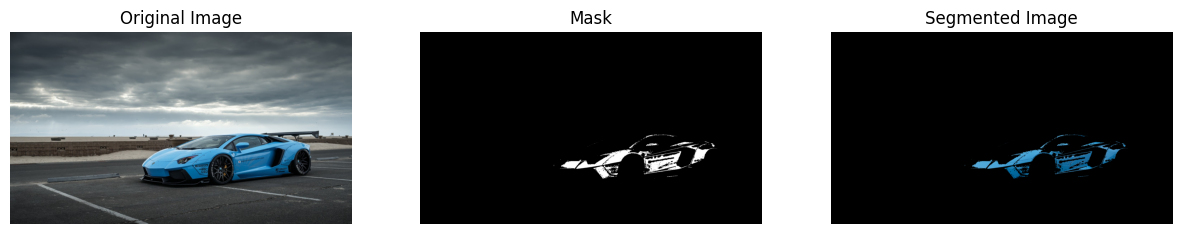

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(mask_rgb)
axes[1].set_title('Mask')
axes[1].axis('off')

axes[2].imshow(result)
axes[2].set_title('Segmented Image')
axes[2].axis('off')

plt.show()